In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
tf.random.set_seed(3)

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Shapes: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


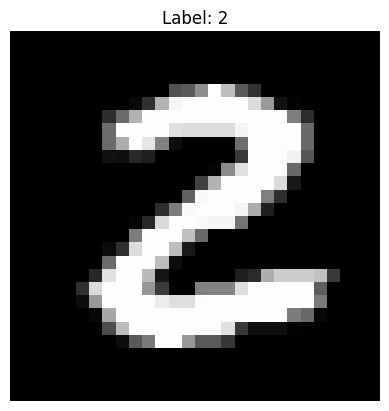

In [4]:
print("Shapes:", X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

plt.imshow(X_train[25], cmap='gray')
plt.title(f"Label: {Y_train[25]}")
plt.axis('off')
plt.show()

In [5]:
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [8]:
model.fit(X_train, Y_train, epochs=1, batch_size=64, validation_split=0.1)

loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", accuracy)

# Predict
Y_pred = model.predict(X_test)
Y_pred_labels = [np.argmax(i) for i in Y_pred]


844/844 ━━━━━━━━━━━━━━━━━━━━ 234s 272ms/step - accuracy: 0.8920 - loss: 0.3549 - val_accuracy: 0.9857 - val_loss: 0.0445
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9801 - loss: 0.0527
Test Accuracy: 0.984499990940094
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step


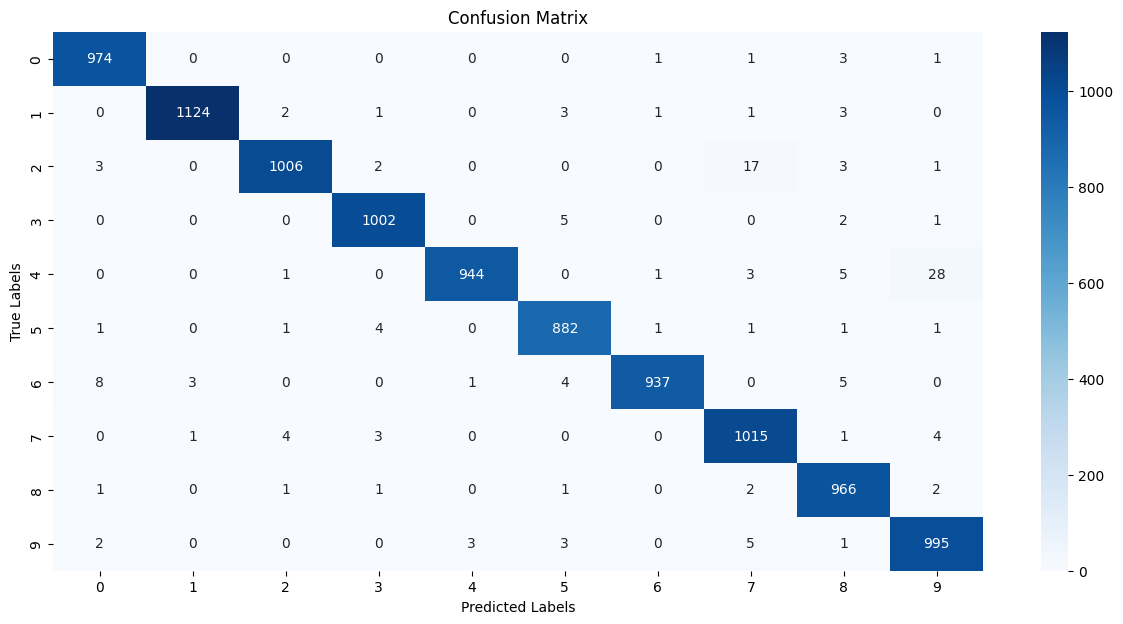

In [9]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Step 1: Read and preprocess the image
def preprocess_external_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise ValueError("Image not found or invalid path.")
    # Resize to 28x28
    img = cv2.resize(img, (28, 28))
    # Invert colors if digit is lighter than background
    if np.mean(img) > 127:
        img = cv2.bitwise_not(img)
    # Apply thresholding for better contrast
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Normalize
    img = img / 255.0
    # Reshape for CNN: (1, 28, 28, 1)
    img = img.reshape(1, 28, 28, 1)
    return img



In [11]:
# Step 2: Get image path
for i in range(1,4):
    #image_path = f"./Datas/imm/{i}.png"    # change for path here if need
    image_path = f"/content/3.png"


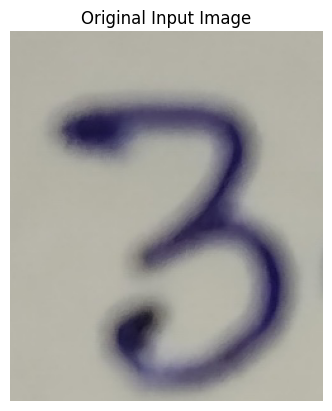

In [12]:
    # Step 3: Display original
    original = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Input Image")
    plt.axis('off')
    plt.show()

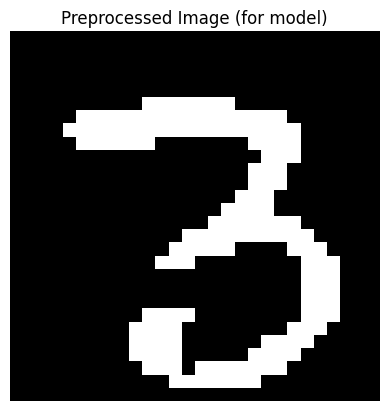

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The Handwritten Digit is recognised as: 3


In [13]:
    # Step 4: Preprocess and show processed version
    processed_image = preprocess_external_image(image_path)

    # For visualization
    plt.imshow(processed_image[0].reshape(28, 28), cmap='gray')
    plt.title("Preprocessed Image (for model)")
    plt.axis('off')
    plt.show()

    # Step 5: Predict
    prediction = model.predict(processed_image)
    predicted_label = np.argmax(prediction)

    print("The Handwritten Digit is recognised as:", predicted_label)